In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os

import pandas as pd

2024-07-30 00:01:55.883393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 00:01:56.034689: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 00:01:56.788634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.10.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:
2024-07-30 00:01:56.788835: W tensorflow/compiler/xla/stre

In [2]:
import json
import sys

from tqdm import tqdm
config_file = "config_kdv.json"

# forcing_type = "linear"

forcing_type = "sin"

with open(config_file, "r") as f:
    config = json.load(f)[forcing_type]

data_path = config["data_settings"]["data_path"]
weights_path = config["nn_settings"]["weights_path"]
figures_path = config["data_settings"]["figures_path"]


In [3]:
tau = 10
results_dict = np.load(os.path.join(data_path, forcing_type+'_tau_'+str(tau)+'_tracking_results.npy'), allow_pickle=True)
# eig_value_64 = results_dict[()]["eigen_value"]
# pk_opt_soln_mass_64 = results_dict[()]["pk_opt_soln_mass"]
# pk_opt_soln_momentum_64 = results_dict[()]["pk_opt_soln_momentum"]
 


2024-07-30 00:01:58.926413: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:
2024-07-30 00:01:58.926450: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-07-30 00:01:58.927359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow 

In [4]:
results_dict_vanilla = np.load(os.path.join(data_path, 'vanilla'+forcing_type+'_tau_'+str(tau)+'_tracking_results.npy'), allow_pickle=True)

In [5]:
pk_kdv_opt_momentum_0 = results_dict[()]["pk_kdv_opt_momentum_0"]
linear_kdv_opt_momentum_0 = results_dict[()]["linear_kdv_opt_momentum_0"]
bilinear_kdv_opt_momentum_0 = results_dict[()]["bilinear_kdv_opt_momentum_0"]
pk_kdv_opt_momentum_5 = results_dict[()]["pk_kdv_opt_momentum_5"]
linear_kdv_opt_momentum_5 = results_dict[()]["linear_kdv_opt_momentum_5"]
bilinear_kdv_opt_momentum_5 = results_dict[()]["bilinear_kdv_opt_momentum_5"]
pk_kdv_opt_mass_0 = results_dict[()]["pk_kdv_opt_mass_0"]
linear_kdv_opt_mass_0 = results_dict[()]["linear_kdv_opt_mass_0"]
bilinear_kdv_opt_mass_0 = results_dict[()]["bilinear_kdv_opt_mass_0"]
pk_kdv_opt_mass_5 = results_dict[()]["pk_kdv_opt_mass_5"]
linear_kdv_opt_mass_5 = results_dict[()]["linear_kdv_opt_mass_5"]
bilinear_kdv_opt_mass_5 = results_dict[()]["bilinear_kdv_opt_mass_5"]
mass_ref = results_dict[()]["mass_ref"]
momentum_ref = results_dict[()]["momentum_ref"]
pk_t_list_momentum_0 = results_dict[()]["pk_t_list_momentum_0"]
linear_t_list_momentum_0 = results_dict[()]["linear_t_list_momentum_0"]
bilinear_t_list_momentum_0 = results_dict[()]["bilinear_t_list_momentum_0"]
pk_t_list_momentum_5 = results_dict[()]["pk_t_list_momentum_5"]
linear_t_list_momentum_5 = results_dict[()]["linear_t_list_momentum_5"]
bilinear_t_list_momentum_5 = results_dict[()]["bilinear_t_list_momentum_5"]

kdv_opt_mass = np.load(os.path.join(data_path, 'kdv_'+forcing_type+'_opt_mass.npy'))

In [6]:
vanilla_kdv_opt_momentum_0 = results_dict_vanilla[()]["vanilla_kdv_opt_momentum_0"]
vanilla_kdv_opt_momentum_5 = results_dict_vanilla[()]["vanilla_kdv_opt_momentum_5"]
vanilla_kdv_opt_mass_0 = results_dict_vanilla[()]["vanilla_kdv_opt_mass_0"]
vanilla_kdv_opt_mass_5 = results_dict_vanilla[()]["vanilla_kdv_opt_mass_5"]
vanilla_t_list_momentum_0 = results_dict_vanilla[()]["vanilla_t_list_momentum_0"]
vanilla_t_list_momentum_5 = results_dict_vanilla[()]["vanilla_t_list_momentum_5"]

In [9]:
# Plot setting
linear_curve = "darkorange"
linear_shadow = "navajowhite"
bilinear_curve = "forestgreen"
bilinear_shadow = "darkseagreen"
pk_curve = "darkblue"
pk_shadow = "lightsteelblue"
vanilla_curve = "deeppink"
vanilla_shadow = "lightcoral"


ref_color = "black"
exact_color = "darkred"

linear_no_penalty_color = "gold"
bilinear_no_penalty_color = "turquoise"
pk_no_penalty_color = "palevioletred"
vanilla_no_penalty_color = "blue"

label_font = 24
ticks_font = 22
legend_font = 24
linewidth = 2.5
title_font = 16

linear_linestyle = "dashdot"
bilinear_linestyle = "dotted"
pk_linestyle = "solid"
vanilla_linestyle = 'dashed'

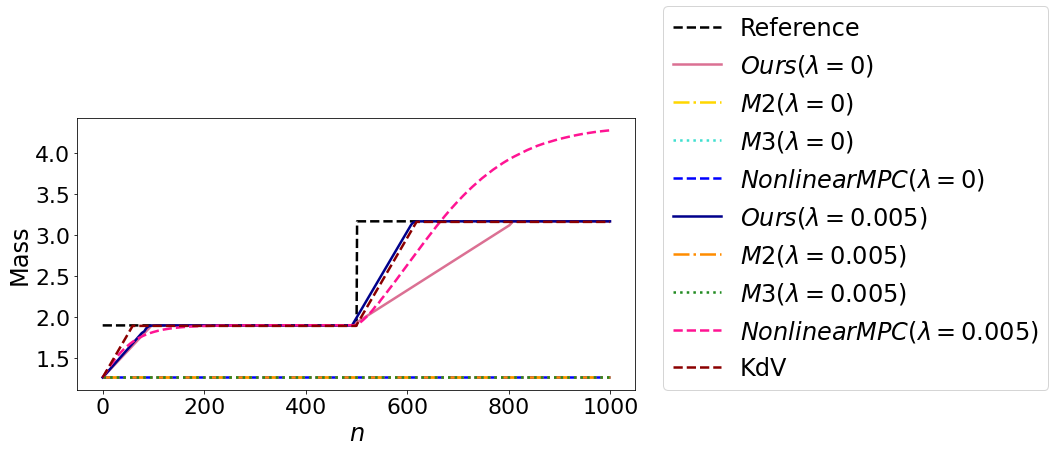

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(mass_ref, label="Reference", linestyle="--", color=ref_color, linewidth=linewidth)

plt.plot(
    pk_kdv_opt_mass_0,
    label=r"$Ours(\lambda = 0)$",
    color=pk_no_penalty_color, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)
plt.plot(
    linear_kdv_opt_mass_0,
    label=r"$M2(\lambda = 0)$",
    color=linear_no_penalty_color,
    linestyle=linear_linestyle,
    linewidth=linewidth
)
plt.plot(
    bilinear_kdv_opt_mass_0,
    label=r"$M3(\lambda = 0)$",
    color=bilinear_no_penalty_color,
    linestyle=bilinear_linestyle,
    linewidth=linewidth
)

plt.plot(
    vanilla_kdv_opt_mass_0,
    label=r"$Nonlinear MPC(\lambda = 0)$",
    color=vanilla_no_penalty_color,
    linestyle=vanilla_linestyle,
    linewidth=linewidth
)

plt.plot(
    pk_kdv_opt_mass_5,
    label=r"$Ours(\lambda = 0.005)$",
    color=pk_curve, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)

plt.plot(
    linear_kdv_opt_mass_5,
    label=r"$M2(\lambda = 0.005)$",
    color=linear_curve,
    linestyle=linear_linestyle,
    linewidth=linewidth
)
plt.plot(
    bilinear_kdv_opt_mass_5,
    label=r"$M3(\lambda = 0.005)$",
    color=bilinear_curve,
    linestyle=bilinear_linestyle,
    linewidth=linewidth
)

plt.plot(
    vanilla_kdv_opt_mass_5,
    label=r"$Nonlinear MPC(\lambda = 0.005)$",
    color=vanilla_curve,
    linestyle=vanilla_linestyle,
    linewidth=linewidth
)

plt.plot(kdv_opt_mass,
         label="KdV",
         color=exact_color,
         linestyle="--",
         linewidth=linewidth)


plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.xlabel(r"$n$", fontsize=label_font)
plt.ylabel("Mass", fontsize=label_font)

plt.legend(fontsize=legend_font, loc=(1.05, 0.001))

# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_mass_tracking_tau'+str(tau)+'.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_mass_tracking_tau'+str(tau)+'.pdf'), dpi=200, bbox_inches='tight')



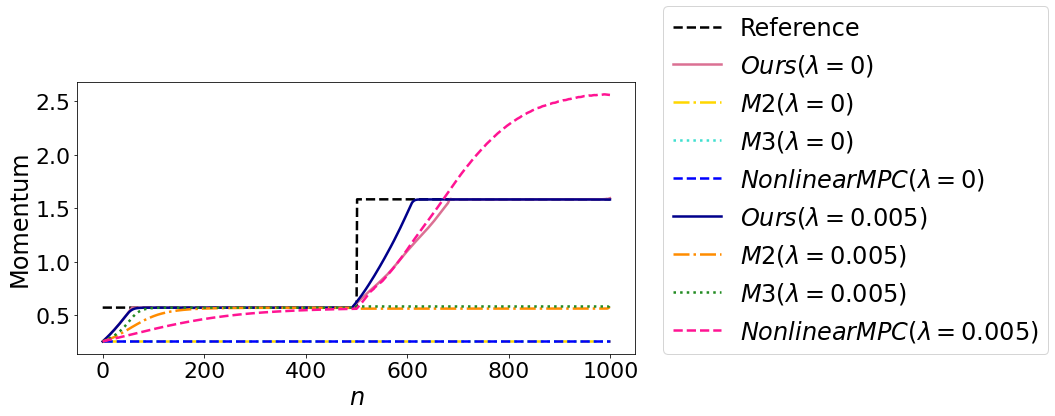

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(momentum_ref, label="Reference", linestyle="--", color=ref_color, linewidth=linewidth)

plt.plot(
    pk_kdv_opt_momentum_0,
    label=r"$Ours(\lambda = 0)$",
    color=pk_no_penalty_color, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)
plt.plot(
    linear_kdv_opt_momentum_0,
    label=r"$M2(\lambda = 0)$",
    color=linear_no_penalty_color,
    linestyle=linear_linestyle,
    linewidth=linewidth
)
plt.plot(
    bilinear_kdv_opt_momentum_0,
    label=r"$M3(\lambda = 0)$",
    color=bilinear_no_penalty_color,
    linestyle=bilinear_linestyle,
    linewidth=linewidth
)

plt.plot(
    vanilla_kdv_opt_momentum_0,
    label=r"$Nonlinear MPC(\lambda = 0)$",
    color=vanilla_no_penalty_color,
    linestyle=vanilla_linestyle,
    linewidth=linewidth
)

plt.plot(
    pk_kdv_opt_momentum_5,
    label=r"$Ours(\lambda = 0.005)$",
    color=pk_curve, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)

plt.plot(
    linear_kdv_opt_momentum_5,
    label=r"$M2(\lambda = 0.005)$",
    color=linear_curve,
    linestyle=linear_linestyle,
    linewidth=linewidth,
)
plt.plot(
    bilinear_kdv_opt_momentum_5,
    label=r"$M3(\lambda = 0.005)$",
    color=bilinear_curve,
    linestyle=bilinear_linestyle,
    linewidth=linewidth,
)

plt.plot(
    vanilla_kdv_opt_momentum_5,
    label=r"$Nonlinear MPC(\lambda = 0.005)$",
    color=vanilla_curve,
    linestyle=vanilla_linestyle,
    linewidth=linewidth
)

plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.xlabel(r"$n$", fontsize=label_font)
plt.ylabel("Momentum", fontsize=label_font)
plt.legend(fontsize=legend_font, loc=(1.05, 0.001))


# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_tracking_tau'+str(tau)+'.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_tracking_tau'+str(tau)+'.pdf'), dpi=200, bbox_inches='tight')


In [13]:
pk_results = pd.read_csv(os.path.join(data_path,"results_dict_list_pk_momentum_5.csv"))
linear_results = pd.read_csv(os.path.join(data_path,"results_dict_list_linear_momentum_5.csv"))
bilinear_results = pd.read_csv(os.path.join(data_path,"results_dict_list_bilinear_momentum_5.csv"))
vanilla_results = pd.read_csv(os.path.join(data_path,"results_dict_list_vanilla_momentum_5.csv"))

In [14]:
pk_t_list_momentum_5 = np.asarray(pk_t_list_momentum_5)
linear_t_list_momentum_5 = np.asarray(linear_t_list_momentum_5)
bilinear_t_list_momentum_5 = np.asarray(bilinear_t_list_momentum_5)
vanilla_t_list_momentum_5 = np.asarray(vanilla_t_list_momentum_5)


pk_results_nit = np.asarray(list(pk_results['nit'])[:-1]) 
linear_results_nit = np.asarray(list(linear_results['nit'])[:-1])
bilinear_results_nit = np.asarray(list(bilinear_results['nit'])[:-1])
vanilla_results_nit = np.asarray(list(vanilla_results['nit'])[:-1])


pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
linear_time_per_iter = linear_t_list_momentum_5 / linear_results_nit
bilinear_time_per_iter = bilinear_t_list_momentum_5 / bilinear_results_nit
vanilla_time_per_iter = vanilla_t_list_momentum_5 / vanilla_results_nit

/tmp/ipykernel_4036419/648039571.py:13: RuntimeWarning: divide by zero encountered in divide
  pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
/tmp/ipykernel_4036419/648039571.py:14: RuntimeWarning: divide by zero encountered in divide
  linear_time_per_iter = linear_t_list_momentum_5 / linear_results_nit
/tmp/ipykernel_4036419/648039571.py:15: RuntimeWarning: divide by zero encountered in divide
  bilinear_time_per_iter = bilinear_t_list_momentum_5 / bilinear_results_nit
/tmp/ipykernel_4036419/648039571.py:16: RuntimeWarning: divide by zero encountered in divide
  vanilla_time_per_iter = vanilla_t_list_momentum_5 / vanilla_results_nit


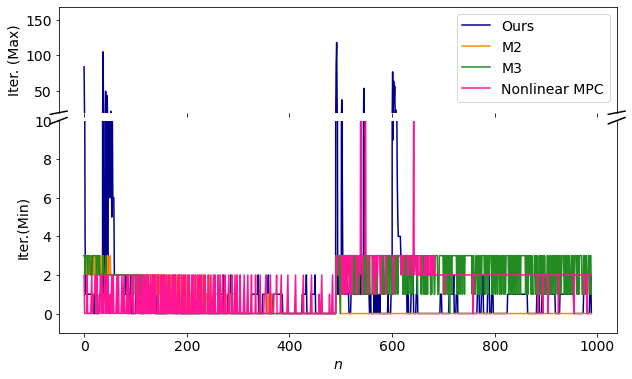

In [15]:
label_font = 14

max_max_value = tf.reduce_max(pk_results_nit) + 50
min_max_value = 20
max_min_value = 10
min_min_value = -1

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Main plot
ax.plot(pk_results_nit, label='Ours', color=pk_curve)
ax.plot(linear_results_nit, label='M2', color=linear_curve)
ax.plot(bilinear_results_nit, label='M3', color=bilinear_curve)
ax.plot(vanilla_results_nit, label='Nonlinear MPC', color=vanilla_curve)
ax.set_ylim(min_max_value, max_max_value)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)  # Hide the top tick labels
ax.legend(fontsize=label_font)

# Subplot for emphasizing lower values
ax2.plot(pk_results_nit, label='Ours', color=pk_curve)
ax2.plot(linear_results_nit, label='M2', color=linear_curve)
ax2.plot(bilinear_results_nit, label='M3', color=bilinear_curve)
ax2.plot(vanilla_results_nit, label='Nonlinear MPC', color=vanilla_curve)
ax2.set_ylim(min_min_value, max_min_value)
ax2.spines['top'].set_visible(False)
# ax2.legend(fontsize=label_font)

# Add break indicators (here using small diagonal slashes)
d = .015  # size of the diagonal slashes
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left corner
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right corner

kwargs.update(transform=ax2.transAxes)  # switch to the second (sub) axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left corner
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right corner

plt.xlabel(r'$n$', fontsize=label_font)
plt.xticks(fontsize=label_font)
plt.yticks(fontsize=label_font)
ax.set_ylabel('Iter. (Max)', fontsize=label_font)
ax2.set_ylabel('Iter.(Min)', fontsize=label_font)

ax.tick_params(axis='x', labelsize=label_font)
ax.tick_params(axis='y', labelsize=label_font)
ax2.tick_params(axis='y', labelsize=label_font)


# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_iter.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_iter.pdf'), dpi=200, bbox_inches='tight')




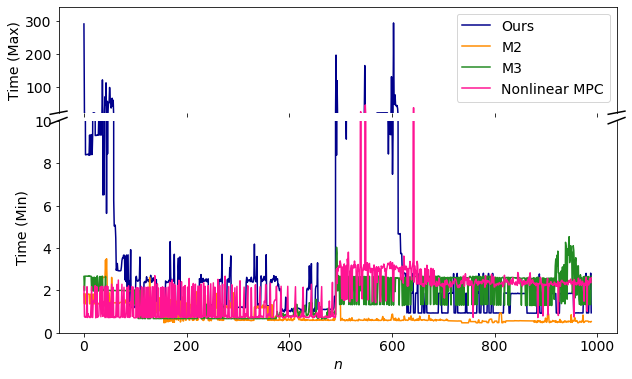

In [16]:
label_font = 14

max_max_value = tf.reduce_max(pk_t_list_momentum_5) + 50
min_max_value = 20
max_min_value = 10

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Main plot
ax.plot(pk_t_list_momentum_5, label='Ours', color=pk_curve)
ax.plot(linear_t_list_momentum_5, label='M2', color=linear_curve)
ax.plot(bilinear_t_list_momentum_5, label='M3', color=bilinear_curve)
ax.plot(vanilla_t_list_momentum_5, label='Nonlinear MPC', color=vanilla_curve)
ax.set_ylim(min_max_value, max_max_value)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)  # Hide the top tick labels
ax.legend(fontsize=label_font)

# Subplot for emphasizing lower values
ax2.plot(pk_t_list_momentum_5, label='Ours', color=pk_curve)
ax2.plot(linear_t_list_momentum_5, label='M2', color=linear_curve)
ax2.plot(bilinear_t_list_momentum_5, label='M3', color=bilinear_curve)
ax2.plot(vanilla_t_list_momentum_5, label='Nonlinear MPC', color=vanilla_curve)
ax2.set_ylim(0, max_min_value)
ax2.spines['top'].set_visible(False)
# ax2.legend(fontsize=label_font)

plt.xticks(fontsize=label_font)
plt.yticks(fontsize=label_font)

# Add break indicators (here using small diagonal slashes)
d = .015  # size of the diagonal slashes
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left corner
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right corner

kwargs.update(transform=ax2.transAxes)  # switch to the second (sub) axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left corner
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right corner

plt.xlabel(r'$n$', fontsize=label_font)
ax.set_ylabel('Time (Max)', fontsize=label_font)
ax2.set_ylabel('Time (Min)', fontsize=label_font)

ax.tick_params(axis='x', labelsize=label_font)
ax.tick_params(axis='y', labelsize=label_font)
ax2.tick_params(axis='y', labelsize=label_font)

# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_t_list.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_t_list.pdf'), dpi=200, bbox_inches='tight')




In [17]:
print('pk', np.mean(pk_t_list_momentum_5))
print('linear', np.mean(linear_t_list_momentum_5))
print('bilinear', np.mean(bilinear_t_list_momentum_5))
print('vanilla', np.mean(vanilla_t_list_momentum_5))


pk 5.816543083460917
linear 0.8379264760186145
bilinear 1.6942181235256524
vanilla 1.9043781750122626
